# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [275]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from IPython.display import display
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [276]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)
#print(list(zip(lats, lngs)))


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#print("list of city : ",cities)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [277]:

#url =f"https://api.openweathermap.org/data/2.5/weather?"
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
#print(url)
response=requests.get(url)
print(response)

#initialize 
recordNum=1
setNum =1
numCityNotFound =0

# Create a dictionary for weather check dataframe (based on the dataframe given in started code)
weatherCheck_dict = {"city":cities,
                     "lon": "",
                     "lat": "",
                     "Max Temp": "",
                     "Humidity": "",
                     "Cloudiness": "",
                     "Wind Speed": "",
                     "Country": "",
                     "Date": "" }

weatherCheck_data = pd.DataFrame(weatherCheck_dict)

print('''Beginning Data Retrieval
-----------------------------''')
#Loop through list of cities and perform a request for data on each of them

for city in cities:
    
    query_url =f"{url}&q={city}"
    #print(query_url)
    response =requests.get(query_url).json()
    #print(response)
    #Try except block to catch the missing city and skipping that one
    try:
        #print log
        print("Processing Record",recordNum,"of Set",setNum,"|",city)
        #Insert data into dataframe
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lon'] = response['coord']['lon']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lat'] = response['coord']['lat']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Max Temp'] = response['main']['temp_max']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Humidity'] = response['main']['humidity']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Cloudiness'] = response['clouds']['all']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Wind Speed'] = response['wind']['speed']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Country'] = response['sys']['country']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Date'] = response['dt']
    except :
        print("City not found. Skipping...")
        numCityNotFound+=1
        
    #increment the record num count
    recordNum+=1
    #Condition to print sets by breakig the records into 50 each
    if recordNum == 51:
        setNum+=1
        recordNum =1
        #time.sleep(60)
      
print('''   
-----------------------------
Data Retrieval Complete      
-----------------------------''')

print("**Number of Cities Not found: ",numCityNotFound)

<Response [400]>
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | saint-augustin
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | balkanabat
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | antofagasta
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | arman
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | abu samrah
Processing Record 21 of Set 1 | orito
Process

Processing Record 37 of Set 4 | walvis bay
Processing Record 38 of Set 4 | rio gallegos
Processing Record 39 of Set 4 | ocos
Processing Record 40 of Set 4 | neryungri
Processing Record 41 of Set 4 | krasnoselkup
Processing Record 42 of Set 4 | mandan
Processing Record 43 of Set 4 | battle creek
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | kaka
Processing Record 46 of Set 4 | shancheng
Processing Record 47 of Set 4 | dwarka
Processing Record 48 of Set 4 | am timan
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | saquena
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | twentynine palms
Processing Record 3 of Set 5 | raudeberg
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | gold coast
Processing Record 6 of Set 5 | takayama
Processing Record 7 of Set 5 | christchurch
Processing Record 8 of Set 5 | acarau
Processing Record 9 of Set 5 | montabaur
Processi

Processing Record 24 of Set 8 | garowe
Processing Record 25 of Set 8 | yulara
Processing Record 26 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 8 | ilhabela
Processing Record 28 of Set 8 | dese
Processing Record 29 of Set 8 | srednekolymsk
Processing Record 30 of Set 8 | manta
Processing Record 31 of Set 8 | yarada
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | arkhangelsk
Processing Record 34 of Set 8 | amot
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | rawson
Processing Record 37 of Set 8 | marcona
City not found. Skipping...
Processing Record 38 of Set 8 | hailar
Processing Record 39 of Set 8 | nalut
Processing Record 40 of Set 8 | alta floresta
Processing Record 41 of Set 8 | seydi
Processing Record 42 of Set 8 | nuevo progreso
Processing Record 43 of Set 8 | serenje
Processing Record 44 of Set 8 | yumen
Processing Record 45 of Set 8 | andrelandia
Processing Record 46 of Set 8 | okoneshnikovo

Processing Record 9 of Set 12 | maragogi
Processing Record 10 of Set 12 | alotau
City not found. Skipping...
Processing Record 11 of Set 12 | envira
Processing Record 12 of Set 12 | renfrew
Processing Record 13 of Set 12 | dongsheng
Processing Record 14 of Set 12 | samarai
Processing Record 15 of Set 12 | nakajo
City not found. Skipping...
Processing Record 16 of Set 12 | les cayes
Processing Record 17 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 18 of Set 12 | vigrestad
Processing Record 19 of Set 12 | lushunkou
City not found. Skipping...
Processing Record 20 of Set 12 | tver
Processing Record 21 of Set 12 | kandrian
Processing Record 22 of Set 12 | vanavara
Processing Record 23 of Set 12 | halalo
City not found. Skipping...
Processing Record 24 of Set 12 | mecca
Processing Record 25 of Set 12 | tadine
Processing Record 26 of Set 12 | jackson
Processing Record 27 of Set 12 | jiaozhou
Processing Record 28 of Set 12 | luanda
Processing Record 29 of Set 12 | ojin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [278]:
#export data to csv file
weatherCheck_data.to_csv("OutputFiles/CityData.csv", index=False, header=True)

#display dataframe
display(weatherCheck_data.head(15))

,city,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bengkulu,102.2655,-3.8004,74.01,92,94,2.28,ID,1659565314
1,kodiak,-152.4072,57.79,67.51,56,0,13.8,US,1659565315
2,new norfolk,147.0587,-42.7826,51.93,86,50,1.01,AU,1659565315
3,punta arenas,-70.9167,-53.15,39.31,87,75,13.8,CL,1659565100
4,amderma,,,,,,,,
5,khatanga,102.5,71.9667,50.54,66,100,9.35,RU,1659565316
6,belushya guba,,,,,,,,
7,dingle,122.6711,10.9995,76.66,91,99,3.2,PH,1659565316
8,saint-augustin,-58.6502,51.226,66.7,70,16,10.36,CA,1659565316
9,nikolskoye,30.7861,59.7035,62.49,85,39,2.75,RU,1659565317


In [279]:
#In order to get summary of data using DESCRIBE FUNCTION, the values must be in Integer format
print("*****What are the data types ?******")
display(weatherCheck_data.dtypes)

#Convert necessary column to integer
weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']]=weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].apply(pd.to_numeric)

    
#Summarize the data
display(weatherCheck_data.describe())


*****What are the data types ?******


city          object
lon           object
lat           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,22.338943,20.575754,69.810143,73.043011,54.860215,7.891111,1.659565e+09
std,90.812561,33.808231,14.026568,19.186085,38.741029,5.419480,7.895531e+01
min,-175.200000,-54.800000,34.920000,14.000000,0.000000,0.000000,1.659565e+09
25%,-58.354225,-8.010900,59.062500,63.000000,15.250000,3.792500,1.659565e+09
50%,28.128200,24.572400,71.165000,78.000000,62.000000,6.610000,1.659565e+09
75%,102.621425,49.187475,80.085000,87.000000,97.000000,10.485000,1.659565e+09
max,179.316700,78.218600,107.690000,100.000000,100.000000,34.650000,1.659565e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [280]:
print("After Inspection from the summary stats , humidity has not gone above 100% ")



After Inspection from the summary stats , humidity has not gone above 100% 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

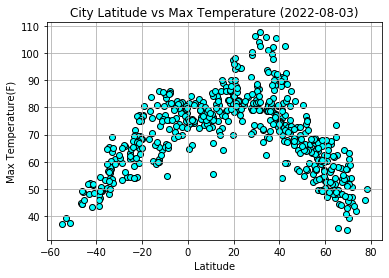

In [284]:
#format the max date in the dataset as "runDate" for graph titles
date = weatherCheck_data["Date"].max()
weatherDate = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d')

plt.title(f"City Latitude vs Max Temperature ({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Max Temp"],c='cyan', edgecolors="black")
plt.savefig("Images/Latitude_vs_Temperature_Plot.png")
plt.show()

In [288]:
### Insights on Latitude vs. Temperature Plot
## This plot shows that temperature rises at equator(latitude = 0) and falls at either ends of axis with latitute -60 and -80.


## Latitude vs. Humidity Plot

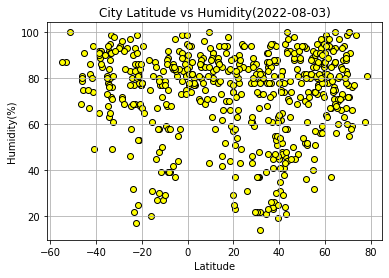

In [287]:
plt.title(f"City Latitude vs Humidity({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Humidity"],c='yellow', edgecolors="black")
plt.savefig("Images/Latitude_vs_Humidity_Plot.png")
plt.show()

In [ ]:
### Insights on Latitude vs. Humidity Plot
## This plot shows that humidity is never at a lowest point at the equator (latitude 0).
## It also reveals that all the cities at equator will have a atleast 75% humidity. 

## Latitude vs. Cloudiness Plot

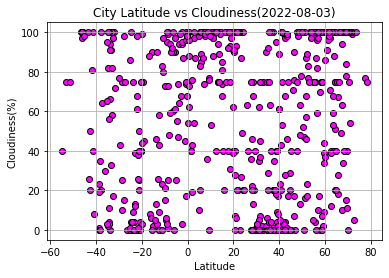

In [289]:
plt.title(f"City Latitude vs Cloudiness({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Cloudiness"],c='magenta', edgecolors="black")
plt.savefig("Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

In [ ]:
### Insights on Latitude vs. Cloudiness Plot
## This graph may not show any correlation but its interesting to observe the density of cities that 100% cloudy and 0% cloudy

## Latitude vs. Wind Speed Plot

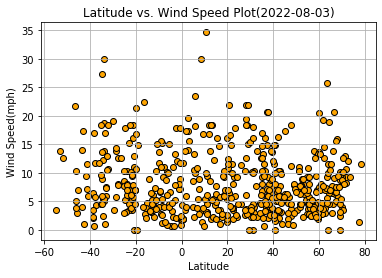

In [294]:
plt.title(f"Latitude vs. Wind Speed Plot({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Wind Speed"],c='orange', edgecolors="black")
plt.savefig("Images/Latitude_vs_WindSpeed_Plot.png")
plt.show()

In [291]:
### Insights on Latitude vs. Wind Speed Plot Plot
## This plot doesn't show any major correlation

## Linear Regression

In [292]:
#Creating a function so it gets call everytime when it needs the execute same code multiple time

def linearRegression(x,y,xy_1,xy_2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_equation)
    print(f'The r-square is: {rvalue}')
    
    plt.scatter(x,y,facecolors="violet",edgecolors='red')
    plt.plot(x,regress_values,"r-",color="purple")
    plt.annotate(line_equation,(xy_1,xy_2),fontsize=15,color="purple")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.48x + 90.94
The r-square is: -0.6772203019063429


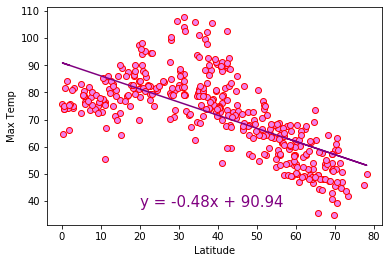

In [293]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Max Temp"]
xy_1=20
xy_2=38

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.73x + 82.5
The r-square is: 0.7673513112012962


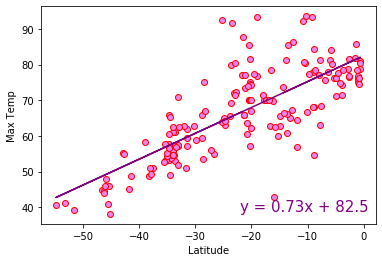

In [264]:
#Data just for sourthern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Max Temp"]
xy_1=-22
xy_2=39

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)
linearRegression(x,y,xy_1,xy_2)


In [ ]:
### Insights on Northwern and Southern Hemisphere - Max Temp vs. Latitude Linear Regression
## This graph shows a  strong correlation. 
## In the northern hemisphere the temperature decreasses as we go away from equator(Latitute =0) and in southern it is opposite

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.06x + 69.52
The r-square is: 0.062619520527292


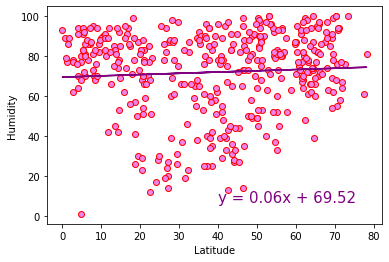

In [265]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Humidity"]
xy_1=40
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.16x + 68.43
The r-square is: -0.11332252299221333


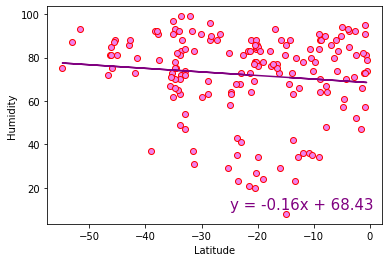

In [266]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Humidity"]
xy_1=-25
xy_2=10

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

In [ ]:
### Insights on Northwern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
## There is no correlation between Humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.07x + 61.42
The r-square is: -0.037558620229462415


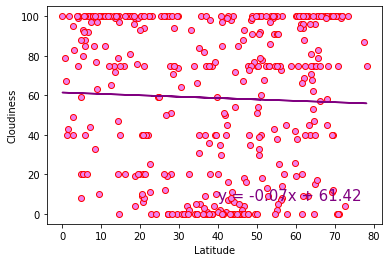

In [267]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Cloudiness"]
xy_1=40
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.13x + 48.38
The r-square is: -0.047562927826590225


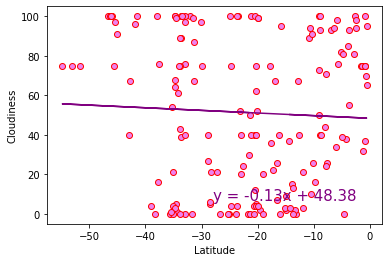

In [268]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Cloudiness"]
xy_1=-28
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

In [ ]:
### Insights on Northwern and Southern Hemisphere -Cloudiness (%) vs. Latitude Linear Regression
## There is no correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x + 8.79
The r-square is: -0.0630500716823538


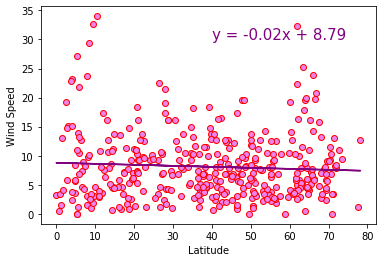

In [269]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Wind Speed"]
xy_1=40
xy_2=30

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03x + 7.59
The r-square is: -0.08259056893226625


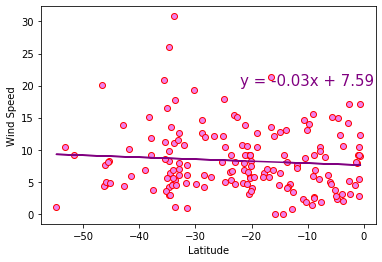

In [270]:
#Data just for northern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Wind Speed"]
xy_1=-22
xy_2=20

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

In [ ]:
### Insights on Northwern and Southern Hemisphere -Wind Speed (mph) vs. Latitude Linear Regression
## There is no correlation between Wind Speed and latitude.